# Implementation of Tic-Tac-Toe

Welcome to the Tic-Tac-Toe AI Project! This project explores various strategies for playing the classic game of Tic-Tac-Toe using artificial intelligence (AI) techniques. <br>

In this notebook, we'll delve into different AI player strategies ranging from basic random moves to more advanced algorithms like Minimax with Alpha-Beta Pruning. Each player strategy is implemented as a function, allowing us to easily compare their performance and analyze their strengths and weaknesses.<br>

Through this exploration, we aim to understand how different AI techniques can be applied to solve simple games like Tic-Tac-Toe and gain insights into their effectiveness in various scenarios.<br>

Let's dive in and explore the world of Tic-Tac-Toe AI! 🎮🤖

## Initialize Game Board and Display functions
Initialization of the game board is represented by the game_matrix variable, which is a 3x3 grid initialized with zeros. The init_sample_game function modifies the global game_matrix with a predefined sample game state. The display_game_board function is defined to display the current state of the game board, where 0 represents an empty cell, 1 represents "O," and 2 represents "X."

In [1]:
# Display Game Board
# 2D array has been used to handle the game matrix
game_matrix = [
    [0,0,0],
    [0,0,0],
    [0,0,0]
]

# Function to initialize a sample game board with random game state to test out created functions(players)
def init_sample_game():
    global game_matrix
    game_matrix = [
        [2, 0, 0],
        [0, 1, 0],
        [1, 0, 0]
    ]
    

# Function for displaying game_matrix array
def display_game_board():
    for row in range(len(game_matrix)):
        for col in range(len(game_matrix[row])):
            if game_matrix[row][col]==0:
                display_value="-"
            elif game_matrix[row][col]==1:
                display_value="O"
            else:
                display_value = "X" 
            print(display_value , end=' ')
        print()
init_sample_game()
display_game_board()

X - - 
- O - 
O - - 


## Check for Win
The provided code defines a function is_win to check if a given player has achieved victory on the game board. It examines rows, columns, and diagonals to determine if all elements in any of these configurations are equal to the specified player (1 or 2)

In [2]:
def is_win(board, player):
    # Check rows
    for row in range(3):
        if board[row][0] == board[row][1] == board[row][2] == player:
            return True

    # Check columns
    for col in range(3):
        if board[0][col] == board[1][col] == board[2][col] == player:
            return True

    # Check diagonals
    if board[0][0] == board[1][1] == board[2][2] == player or board[0][2] == board[1][1] == board[2][0] == player:
        return True

    return False
    
is_win(game_matrix,2)

False

## Check Placeable Locations

This defines a function, placeable_indexes, which is designed to identify and return the indexes of locations on the game board where the value is 0. These locations are considered "placeable," as they are empty and can be used by players to make their moves. The function iterates through each row and column of the provided game board, checks for a value of 0 at each position, and compiles a list of the corresponding indexes. The result is a list of lists, where each inner list represents the row and column indexes of a placeable location on the game board.

In [3]:
# Check placeable locations -> Available locations are being checked where user can put X or O.
# Identify indexes which have 0 as the value
def placeable_indexes(board):
    possible_indexes=[]
    for row in range(len(board)):
        for col in range(len(game_matrix[row])):
            if(board[row][col]==0):
                possible_indexes.append([row,col])
    return possible_indexes

placeable_indexes(game_matrix)


[[0, 1], [0, 2], [1, 0], [1, 2], [2, 1], [2, 2]]

# Random Player Move

In here player_random is defined to represent a simple computer player that makes random moves. The function takes the game board and a player as input, retrieves the list of placeable indexes using the placeable_indexes function, and then randomly selects one of these indexes. Finally, the selected index is used to make a move on the game board by assigning the player's value to that position.

In [4]:
import random
# Randomly select the next position by the PC player
def player_random(board,player):
    possible_indexes = placeable_indexes(board)
    selected_index = random.choice(possible_indexes)
    # Make changs to the game board
    board[selected_index[0]][selected_index[1]]=player

player_random(game_matrix,2)
display_game_board()

X - - 
- O X 
O - - 


## Identifying patterns of different players
The provided code introduces multiple players, each associated with a specific pattern (G0, G1, or G4) for making moves on the game board. For instance, player_014 selects random positions based on the pattern priorities (G0, G1, G4) and assigns the player's value to the chosen location. The same logic is applied to other pattern players like player_041, player_104, player_140, player_401, and player_410. Each player function uses the placeable_indexes function to identify available positions on the board, and then it randomly selects and updates a position according to the predefined pattern priorities.
<br><br>
<b>This drawing can be used to identify indexes on the game board easily.</b>
<div>
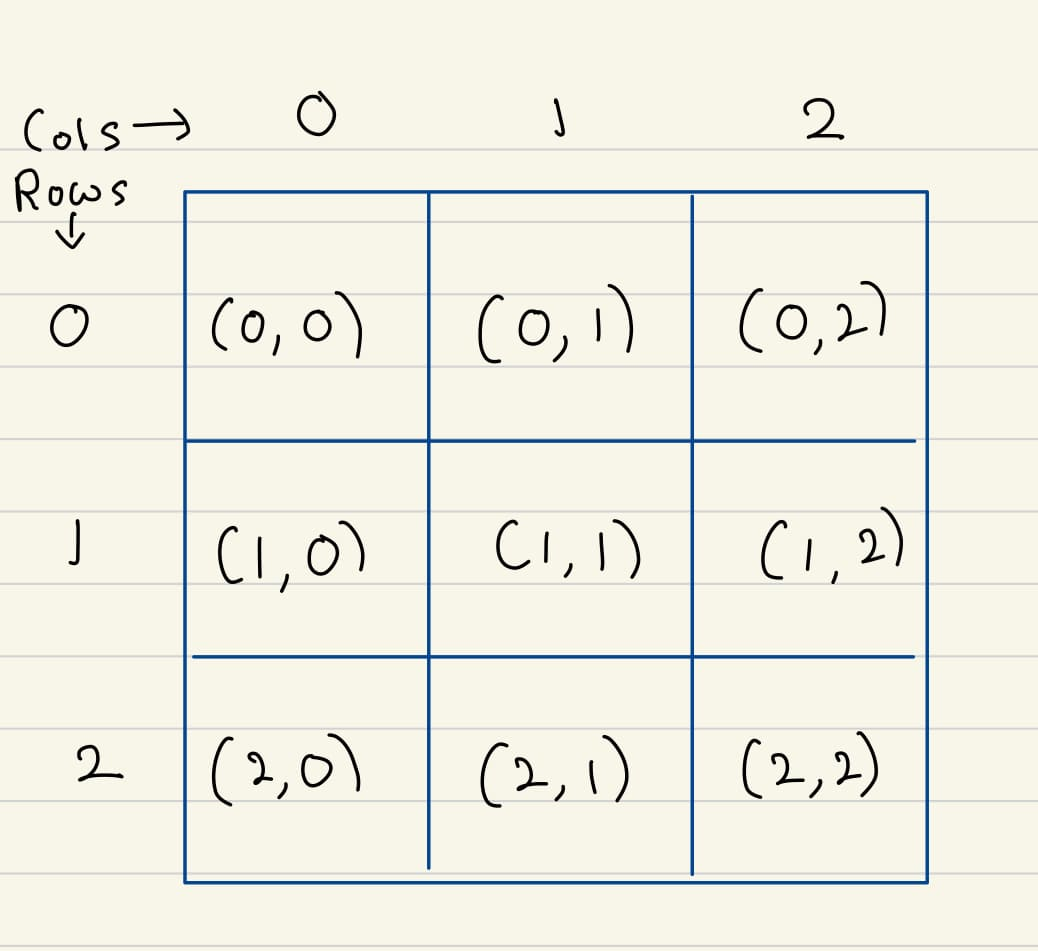
</div>

In [5]:
import random
from sympy import Intersection

G0 = {(0, 0), (0, 2), (2, 0), (2, 2)}
G1 = {(0, 1), (1, 0), (1, 2), (2, 1)}
G4 = {(1, 1)}

def player_014(board, player):
    possible_indexes = placeable_indexes(board)
    
    # Convert elements of possible_indexes to tuples
    possible_indexes = [tuple(idx) for idx in possible_indexes]
    
    # Convert lists to sets
    intersection_arr0 = list(Intersection(set(possible_indexes), G0))
    intersection_arr1 = list(Intersection(set(possible_indexes), G1))
    intersection_arr4 = list(Intersection(set(possible_indexes), G4))

    if len(intersection_arr0) > 0:
        selected_index = random.choice(intersection_arr0)
    elif len(intersection_arr1) > 0:
        selected_index = random.choice(intersection_arr1)
    else:
        selected_index = random.choice(intersection_arr4)

    board[selected_index[0]][selected_index[1]]=player

def player_041(board, player):
    possible_indexes = placeable_indexes(board)
    
    # Convert elements of possible_indexes to tuples
    possible_indexes = [tuple(idx) for idx in possible_indexes]
    
    # Convert lists to sets
    intersection_arr0 = list(Intersection(set(possible_indexes), G0))
    intersection_arr1 = list(Intersection(set(possible_indexes), G1))
    intersection_arr4 = list(Intersection(set(possible_indexes), G4))

    if len(intersection_arr0) > 0:
        selected_index = random.choice(intersection_arr0)
    elif len(intersection_arr4) > 0:
        selected_index = random.choice(intersection_arr4)
    else:
        selected_index = random.choice(intersection_arr1)

    board[selected_index[0]][selected_index[1]]=player

def player_104(board, player):
    possible_indexes = placeable_indexes(board)
    
    # Convert elements of possible_indexes to tuples
    possible_indexes = [tuple(idx) for idx in possible_indexes]
    
    # Convert lists to sets
    intersection_arr0 = list(Intersection(set(possible_indexes), G0))
    intersection_arr1 = list(Intersection(set(possible_indexes), G1))
    intersection_arr4 = list(Intersection(set(possible_indexes), G4))

    if len(intersection_arr1) > 0:
        selected_index = random.choice(intersection_arr1)
    elif len(intersection_arr0) > 0:
        selected_index = random.choice(intersection_arr0)
    else:
        selected_index = random.choice(intersection_arr4)

    board[selected_index[0]][selected_index[1]]=player

def player_140(board, player):
    possible_indexes = placeable_indexes(board)
    
    # Convert elements of possible_indexes to tuples
    possible_indexes = [tuple(idx) for idx in possible_indexes]
    
    # Convert lists to sets
    intersection_arr0 = list(Intersection(set(possible_indexes), G0))
    intersection_arr1 = list(Intersection(set(possible_indexes), G1))
    intersection_arr4 = list(Intersection(set(possible_indexes), G4))

    if len(intersection_arr1) > 0:
        selected_index = random.choice(intersection_arr1)
    elif len(intersection_arr4) > 0:
        selected_index = random.choice(intersection_arr4)
    else:
        selected_index = random.choice(intersection_arr0)

    board[selected_index[0]][selected_index[1]]=player

def player_401(board, player):
    possible_indexes = placeable_indexes(board)
    
    # Convert elements of possible_indexes to tuples
    possible_indexes = [tuple(idx) for idx in possible_indexes]
    
    # Convert lists to sets
    intersection_arr0 = list(Intersection(set(possible_indexes), G0))
    intersection_arr1 = list(Intersection(set(possible_indexes), G1))
    intersection_arr4 = list(Intersection(set(possible_indexes), G4))

    if len(intersection_arr4) > 0:
        selected_index = random.choice(intersection_arr4)
    elif len(intersection_arr0) > 0:
        selected_index = random.choice(intersection_arr0)
    else:
        selected_index = random.choice(intersection_arr1)

    board[selected_index[0]][selected_index[1]]=player

def player_410(board, player):
    possible_indexes = placeable_indexes(board)
    
    # Convert elements of possible_indexes to tuples
    possible_indexes = [tuple(idx) for idx in possible_indexes]
    
    # Convert lists to sets
    intersection_arr0 = list(Intersection(set(possible_indexes), G0))
    intersection_arr1 = list(Intersection(set(possible_indexes), G1))
    intersection_arr4 = list(Intersection(set(possible_indexes), G4))

    if len(intersection_arr4) > 0:
        selected_index = random.choice(intersection_arr4)
    elif len(intersection_arr1) > 0:
        selected_index = random.choice(intersection_arr1)
    else:
        selected_index = random.choice(intersection_arr0)

    board[selected_index[0]][selected_index[1]]=player
    


## Game Control Function

Game control function, game_control, which simulates a series of Tic-Tac-Toe games between two specified players (player1 and player2). The function runs for a specified number of games (num_games). For each game, it initializes an empty game matrix and iteratively allows players to make moves until a win or draw condition is met. The game statistics, including the number of wins for each player and draws, are recorded and summarized at the end. The summary includes the win ratios for both players and the draw ratio over the total number of games.

In [6]:
# Note: created a simple game control function (similar to the function given in the example Tic-Tac-Toe game) for now so that we can use it in the future for this app.
def game_control(num_games, player1, player2):
    player1_wins = 0
    player2_wins = 0
    draws = 0
    game_records = []

    for game_num in range(1, num_games + 1):
        game_matrix = [
            [0, 0, 0],
            [0, 0, 0],
            [0, 0, 0]
        ]

        turn_counter = 0
        game_result = 0  # 0: Draw, 1: Player 1 wins, 2: Player 2 wins

        while True:
            if turn_counter % 2 == 0:
                player_index = 1
                player = player1
            else:
                player_index = 2
                player = player2

            player(game_matrix, player_index)

            if is_win(game_matrix, player_index):
                game_result = player_index
                break

            if not any(0 in row for row in game_matrix):
                break

            turn_counter += 1

        # Update game statistics
        if game_result == 1:
            player1_wins += 1
        elif game_result == 2:
            player2_wins += 1
        else:
            draws += 1

        # Record game result
        game_records.append((turn_counter, game_result))

    # Report Game Summary
    print("Game summary\n")
    print(f"Repeat {num_games} times")
    print(f"{player1.__name__} wins: {player1_wins}, ratio: {player1_wins / num_games:.2f}")
    print(f"{player2.__name__} wins: {player2_wins}, ratio: {player2_wins / num_games:.2f}")
    print(f"Draws: {draws}, ratio: {draws / num_games:.2f}")
    print()

    # Report Game Records
    #print("Game records (turn : winner)\n")
    #for game_num, (turns, winner) in enumerate(game_records):
    #   print(f"{game_num + 1:4} : {winner} ({turns} turns)")



## Test Bench for above player functions
This test bench assesses the performance of six player functions (player_014, player_041, player_104, player_140, player_401, player_410) by simulating 1000 games for all possible pairings. The nested loops iterate through each combination of two players, allowing for a comprehensive evaluation of their success ratios. The output displays the results of each matchup, including the win ratios for both players and the draw ratio, providing insights into the effectiveness of each player strategy against others.

In [7]:
## Test bench to check 6 functions

import itertools

players = [player_014,player_041,player_104,player_140,player_401,player_410]

for p1 in range(5):
    for p2 in range(6):
        print(f"{players[p1].__name__} vs {players[p2].__name__}")
        game_control(1000,players[p1],players[p2])
        print()



player_014 vs player_014
Game summary

Repeat 1000 times
player_014 wins: 599, ratio: 0.60
player_014 wins: 167, ratio: 0.17
Draws: 234, ratio: 0.23


player_014 vs player_041
Game summary

Repeat 1000 times
player_014 wins: 428, ratio: 0.43
player_041 wins: 402, ratio: 0.40
Draws: 170, ratio: 0.17


player_014 vs player_104
Game summary

Repeat 1000 times
player_014 wins: 1000, ratio: 1.00
player_104 wins: 0, ratio: 0.00
Draws: 0, ratio: 0.00


player_014 vs player_140
Game summary

Repeat 1000 times
player_014 wins: 1000, ratio: 1.00
player_140 wins: 0, ratio: 0.00
Draws: 0, ratio: 0.00


player_014 vs player_401
Game summary

Repeat 1000 times
player_014 wins: 688, ratio: 0.69
player_401 wins: 165, ratio: 0.17
Draws: 147, ratio: 0.15


player_014 vs player_410
Game summary

Repeat 1000 times
player_014 wins: 0, ratio: 0.00
player_410 wins: 1000, ratio: 1.00
Draws: 0, ratio: 0.00


player_041 vs player_014
Game summary

Repeat 1000 times
player_041 wins: 464, ratio: 0.46
player_014 w

# Player_L0

Based on the statistical analysis conducted on the six player functions (player_014, player_041, player_104, player_140, player_401, player_410), it has been determined that **player_401** exhibits the highest overall win ratio. Therefore, player_L0 is chosen, and its implementation is provided above.

In [8]:
# According to above stats, player_401 has the highest overall win ratio
# So we can select palyer_401 as the player_L0
def player_L0(board, player):
    possible_indexes = placeable_indexes(board)
    
    # Convert elements of possible_indexes to tuples
    possible_indexes = [tuple(idx) for idx in possible_indexes]
    
    # Convert lists to sets
    intersection_arr0 = list(Intersection(set(possible_indexes), G0))
    intersection_arr1 = list(Intersection(set(possible_indexes), G1))
    intersection_arr4 = list(Intersection(set(possible_indexes), G4))

    if len(intersection_arr4) > 0:
        selected_index = random.choice(intersection_arr4)
    elif len(intersection_arr0) > 0:
        selected_index = random.choice(intersection_arr0)
    else:
        selected_index = random.choice(intersection_arr1)

    board[selected_index[0]][selected_index[1]]=player




## Test Bench : Player_L0 vs Player_Random
The provided test bench evaluates the win ratios between player_L0 and player_random. The game control function is utilized to simulate 1000 games between these two players, and the outcomes are analyzed.

This test is essential to gauge the effectiveness of the strategic decisions made by player_L0 against the randomness introduced by player_random. The results will provide insights into whether the prioritization of winning moves and defensive strategies in player_L0 contributes to a higher win ratio compared to a purely random approach.

In [9]:
# Test bench to check win ratios between player_L0 and player_random
## Test bench to check 6 functions

players = [player_L0,player_random]

for p1 in range(1):
    for p2 in range(2):
        print(f"{players[p1].__name__} vs {players[p2].__name__}")
        game_control(1000,players[p1],players[p2])
        print()


player_L0 vs player_L0
Game summary

Repeat 1000 times
player_L0 wins: 500, ratio: 0.50
player_L0 wins: 262, ratio: 0.26
Draws: 238, ratio: 0.24


player_L0 vs player_random
Game summary

Repeat 1000 times
player_L0 wins: 840, ratio: 0.84
player_random wins: 75, ratio: 0.07
Draws: 85, ratio: 0.09




## Player_L1

The player_L1 function represents a player which has inherited basic functionality of player_L0 but additionally this player is checking if there is a place where the player can win by placing the player's symbol in that place.

<br><br>
*The debug parameter can be used to print additional information about the decision-making process for debugging purposes.






In [10]:
# Player_L1

import copy
import random
from sympy import Intersection

def player_L1(board, player,debug=0):
    possible_indexes = placeable_indexes(board)
    
    # Convert elements of possible_indexes to tuples
    possible_indexes = [tuple(idx) for idx in possible_indexes]
    
    # Convert lists to sets
    intersection_arr0 = list(Intersection(set(possible_indexes), G0))
    intersection_arr1 = list(Intersection(set(possible_indexes), G1))
    intersection_arr4 = list(Intersection(set(possible_indexes), G4))

    if(debug==1):
        print("I0", intersection_arr0)
        print("I1", intersection_arr1)
        print("I4", intersection_arr4)
        print()

    if len(intersection_arr4) > 0:
        selected_indexes = intersection_arr4
    elif len(intersection_arr0) > 0:
        selected_indexes = intersection_arr0
    else:
        selected_indexes = intersection_arr1
        
    if(debug==1):
        print("Selected Indexes", selected_indexes)

    # Check if a win can be achieved 
    win_found = False
    win_row, win_col = None, None
    for row, col in selected_indexes:
        # Deep copy to prevent making changes to the original board
        temp_board = copy.deepcopy(board)
        temp_board[row][col] = player
        if is_win(temp_board, player):
            win_found = True
            win_row=row
            win_col=col
            break

    if win_found:
        # Make changes to the original board
        board[win_row][win_col] = player
    else:
        # Select index randomly and make changes to the original board
        selected_index = random.choice(selected_indexes)
        board[selected_index[0]][selected_index[1]] = player

# Sample Run
init_sample_game()
display_game_board()
print()
player_L1(game_matrix, 2)
print()
display_game_board()


X - - 
- O - 
O - - 


X - X 
- O - 
O - - 


## Test Bench: Player L0 vs. Player L1
The test bench evaluates the win ratios between two player strategies: player_L0 and player_L1.<br>These player strategies are pitted against each other in various combinations to observe their performance across multiple games.

- Player_L0: This player strategy selects moves based on predefined groups of indexes (G0, G1, G4). The decision-making process considers winning moves within these groups and introduces randomness when needed.

- Player_L1: This player strategy prioritizes moves based on predefined groups of indexes (G0, G1, G4). It aims to select winning moves if available within the chosen group, introducing randomness if no winning move is found.

In [11]:
# Test bench to check win ratios between player_L0 and player_L1
from itertools import product
players = [player_L0,player_L1]

for p1, p2 in product(players, repeat=2):
    print(f"{p1.__name__} vs {p2.__name__}")
    game_control(1000,p1,p2)
    print()

player_L0 vs player_L0
Game summary

Repeat 1000 times
player_L0 wins: 535, ratio: 0.54
player_L0 wins: 267, ratio: 0.27
Draws: 198, ratio: 0.20


player_L0 vs player_L1
Game summary

Repeat 1000 times
player_L0 wins: 355, ratio: 0.35
player_L1 wins: 645, ratio: 0.65
Draws: 0, ratio: 0.00


player_L1 vs player_L0
Game summary

Repeat 1000 times
player_L1 wins: 671, ratio: 0.67
player_L0 wins: 225, ratio: 0.23
Draws: 104, ratio: 0.10


player_L1 vs player_L1
Game summary

Repeat 1000 times
player_L1 wins: 320, ratio: 0.32
player_L1 wins: 680, ratio: 0.68
Draws: 0, ratio: 0.00




## Player_L2
Player_L2 introduces <b>defensive strategies</b> along with <b>offensive moves</b> to improve overall gameplay. <br>
This player strategy prioritizes moves based on predefined groups of indexes (G0, G1, G4). The decision-making process involves the following steps:

- Winning Move: If a winning move is available within the chosen group, Player_L2 selects that move to secure a victory.

- Defensive Move: If no winning move is found, Player_L2 assesses the opponent's potential winning moves and aims to block them by placing its own piece strategically.

- Random Move: If neither a winning nor a defensive move is identified, Player_L2 resorts to choosing a random move within the specified group.

The inclusion of defensive considerations enhances the strategic depth of Player_L2, making it more versatile in responding to both offensive and defensive aspects of the game.

In [12]:
import copy
import random
from sympy import Intersection

def player_L2(board, player, debug=0):
    possible_indexes = placeable_indexes(board)
    
    # Convert elements of possible_indexes to tuples
    possible_indexes = [tuple(idx) for idx in possible_indexes]
    
    # Convert lists to sets
    intersection_arr0 = list(Intersection(set(possible_indexes), G0))
    intersection_arr1 = list(Intersection(set(possible_indexes), G1))
    intersection_arr4 = list(Intersection(set(possible_indexes), G4))

    if(debug==1):
        print("I0", intersection_arr0)
        print("I1", intersection_arr1)
        print("I4", intersection_arr4)
        print()

    # Check if there is a winning move for the player
    win_found = False
    win_row, win_col = None, None
    for row, col in possible_indexes:
        temp_board = copy.deepcopy(board)
        temp_board[row][col] = player
        if is_win(temp_board, player):
            win_found = True
            win_row, win_col = row, col
            break

    if win_found:
        board[win_row][win_col] = player
    else:
        # Check if there is a winning move for the opponent to block
        defence_found = False
        defence_row, defence_col = None, None
        opponent = 3 - player  #  players are represented as 1 and 2
        for row, col in possible_indexes:
            temp_board = copy.deepcopy(board)
            temp_board[row][col] = opponent
            if is_win(temp_board, opponent):
                defence_found = True
                defence_row, defence_col = row, col
                break

        if defence_found:
            board[defence_row][defence_col] = player
        else:
            # If no winning or blocking moves, choose randomly
            selected_index = random.choice(possible_indexes)
            board[selected_index[0]][selected_index[1]] = player

# Sample Run
init_sample_game()
display_game_board()
print()
player_L2(game_matrix, 2)
print()
display_game_board()


X - - 
- O - 
O - - 


X - X 
- O - 
O - - 


# Test Bench: player_L0, player_L1, and player_L2

This test bench executes combinations of games between the players: player_L0, player_L1, and player_L2.
<br>
 The purpose is to analyze and compare the win ratios between different player strategies.


In [13]:
# Test bench to check win ratios between player_L0, player_L1 and player_L2
from itertools import product
players = [player_L0,player_L1, player_L2]

for p1, p2 in product(players, repeat=2):
    print(f"{p1.__name__} vs {p2.__name__}")
    game_control(1000,p1,p2)
    print()

player_L0 vs player_L0
Game summary

Repeat 1000 times
player_L0 wins: 482, ratio: 0.48
player_L0 wins: 281, ratio: 0.28
Draws: 237, ratio: 0.24


player_L0 vs player_L1
Game summary

Repeat 1000 times
player_L0 wins: 344, ratio: 0.34
player_L1 wins: 656, ratio: 0.66
Draws: 0, ratio: 0.00


player_L0 vs player_L2
Game summary

Repeat 1000 times
player_L0 wins: 193, ratio: 0.19
player_L2 wins: 695, ratio: 0.69
Draws: 112, ratio: 0.11


player_L1 vs player_L0
Game summary

Repeat 1000 times
player_L1 wins: 687, ratio: 0.69
player_L0 wins: 211, ratio: 0.21
Draws: 102, ratio: 0.10


player_L1 vs player_L1
Game summary

Repeat 1000 times
player_L1 wins: 316, ratio: 0.32
player_L1 wins: 684, ratio: 0.68
Draws: 0, ratio: 0.00


player_L1 vs player_L2
Game summary

Repeat 1000 times
player_L1 wins: 288, ratio: 0.29
player_L2 wins: 657, ratio: 0.66
Draws: 55, ratio: 0.06


player_L2 vs player_L0
Game summary

Repeat 1000 times
player_L2 wins: 927, ratio: 0.93
player_L0 wins: 27, ratio: 0.03
Dra

## Improving the player by introducing algorithms

## Function to Check for Draw

The provided function, `is_draw`, determines whether the current game board is a draw by examining each cell. It iterates through the entire board, and if it finds any empty cell (denoted by a value of 0), it concludes that the game is not a draw. Otherwise, if all cells are filled, the function returns True, indicating a draw.


In [14]:
# Function to check if the game is draw by checking if there are any empty cells
def is_draw(board):
    for row in board:
        for cell in row:
            if cell == 0:
                return False  # If any cell is empty, it's not a draw
    return True 

## Player using Minimax Algorithm

Here it defines a player implementation using the Minimax algorithm for decision-making in a game. The algorithm assigns scores (-1, 0, 1) to different game states, representing losing, draw, and winning outcomes for the current player. The `minimax` function implements the Minimax algorithm to find the best move.

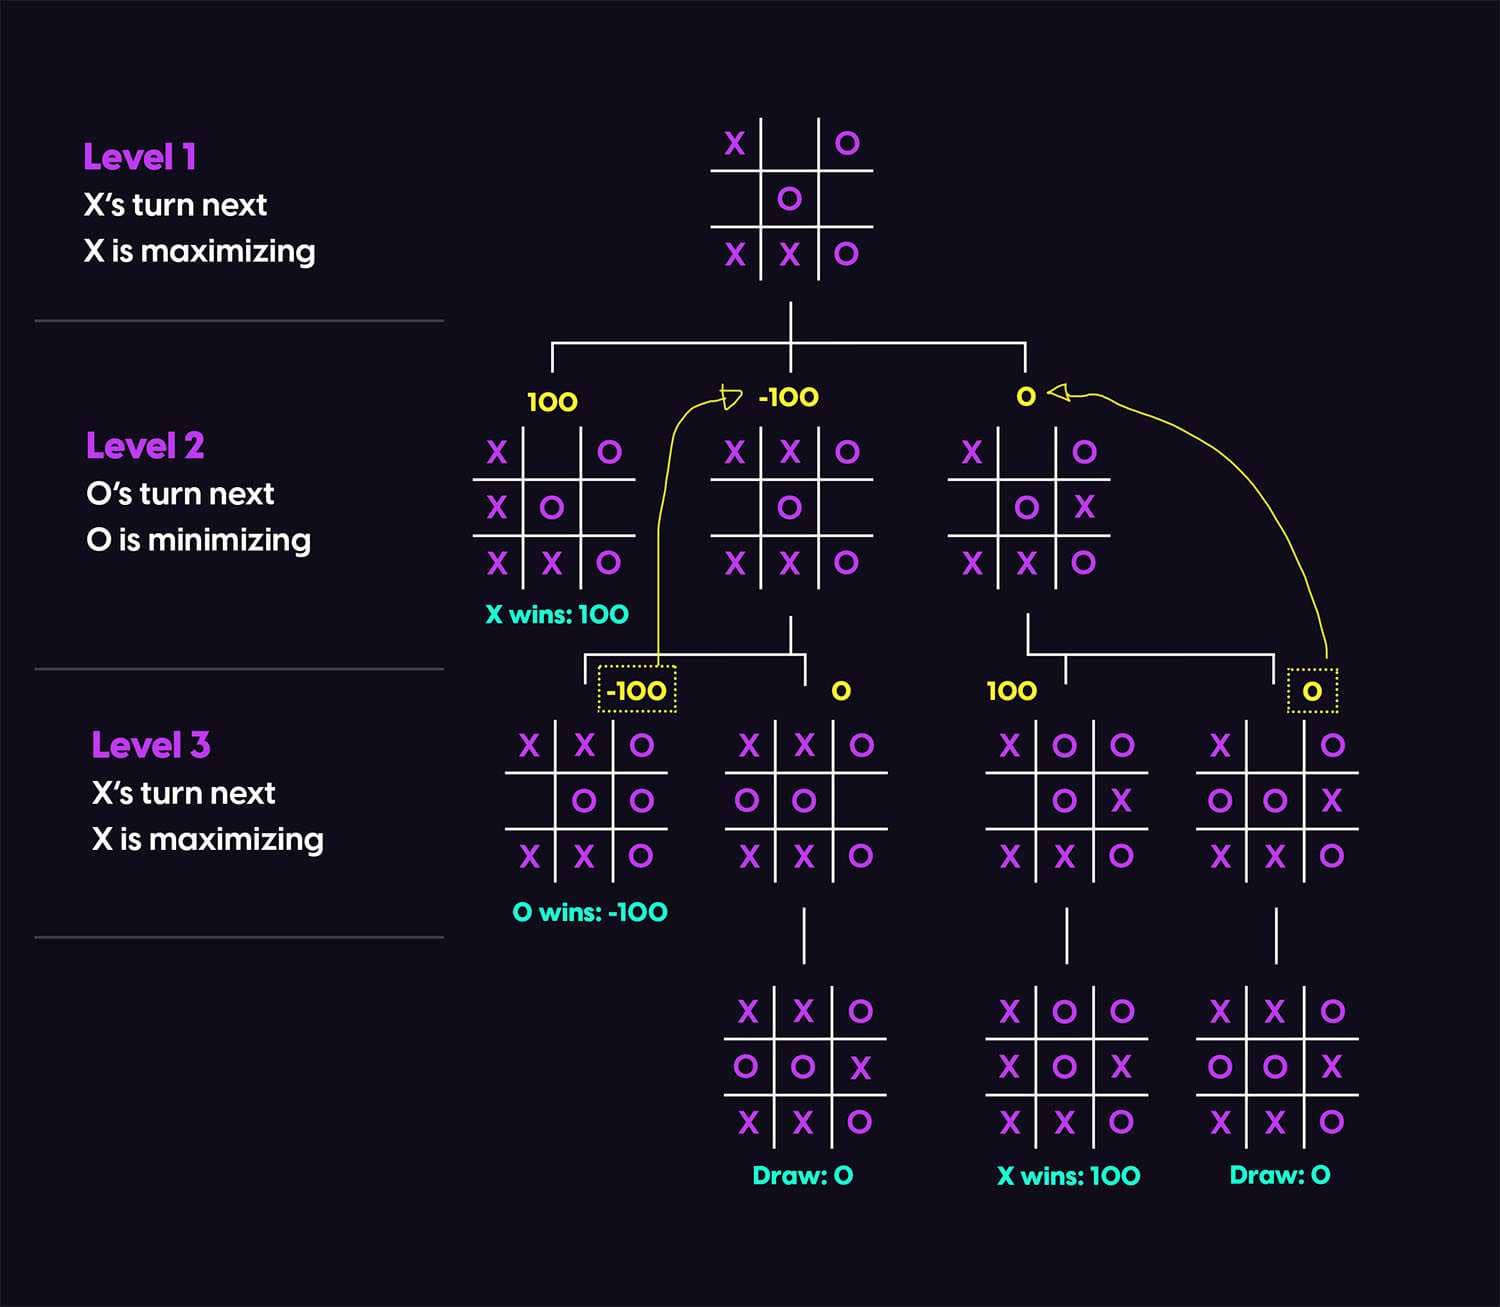

The `player_MiniMax` function utilizes the Minimax algorithm to make decisions based on the provided depth parameter. The sample run demonstrates the player_MinMax function in a game scenario.


In [15]:
import copy

def player_MiniMax(board, player, debug=0):
    possible_moves = placeable_indexes(board)
    best_score = float('-inf')
    best_move = None
    
    for move in possible_moves:
        row, col = move
        temp_board = copy.deepcopy(board)
        temp_board[row][col] = player
        score = minimax(temp_board, 0, False, player)
        
        if score > best_score:
            best_score = score
            best_move = move
    
    if best_move is not None:
        board[best_move[0]][best_move[1]] = player

def minimax(board, depth, is_maximizing, player):
    scores = {'1': -1, '2': 1, 'draw': 0}
    
    winner = get_winner(board, player)
    if winner is not None:
        return scores[winner]
    
    if is_draw(board):
        return scores['draw']
    
    if is_maximizing:
        best_score = float('-inf')
        possible_moves = placeable_indexes(board)
        
        for move in possible_moves:
            row, col = move
            temp_board = copy.deepcopy(board)
            temp_board[row][col] = player
            score = minimax(temp_board, depth + 1, False, player)
            best_score = max(score, best_score)
            
        return best_score
    else:
        best_score = float('inf')
        possible_moves = placeable_indexes(board)
        
        for move in possible_moves:
            row, col = move
            temp_board = copy.deepcopy(board)
            temp_board[row][col] = 3 - player  # Opponent's move / Switching player
            score = minimax(temp_board, depth + 1, True, player)
            best_score = min(score, best_score)
            
        return best_score

def get_winner(board, player):
    if is_win(board, player):
        return str(player)
    elif is_win(board, 3 - player):  # Opponent's player
        return str(3 - player)
    elif is_draw(board):
        return 'draw'
    else:
        return None

# Sample Run
init_sample_game()
display_game_board()
print()
player_MiniMax(game_matrix, 2)
print()
display_game_board()


X - - 
- O - 
O - - 


X - X 
- O - 
O - - 


## MiniMax alogrithm with Alpha-Beta Pruning

### What is Alpha-Beta Pruning?
Alpha-Beta pruning is a search algorithm commonly used in game theory to improve decision-making efficiency by reducing the number of evaluated nodes in the game tree, especially in games with large search spaces.

The code introduces the Alpha-Beta Pruning optimization to the Minimax algorithm for more efficient decision-making. The `minimax_alphabeta` function implements the Minimax algorithm with Alpha-Beta Pruning, reducing unnecessary evaluations by maintaining alpha and beta values.

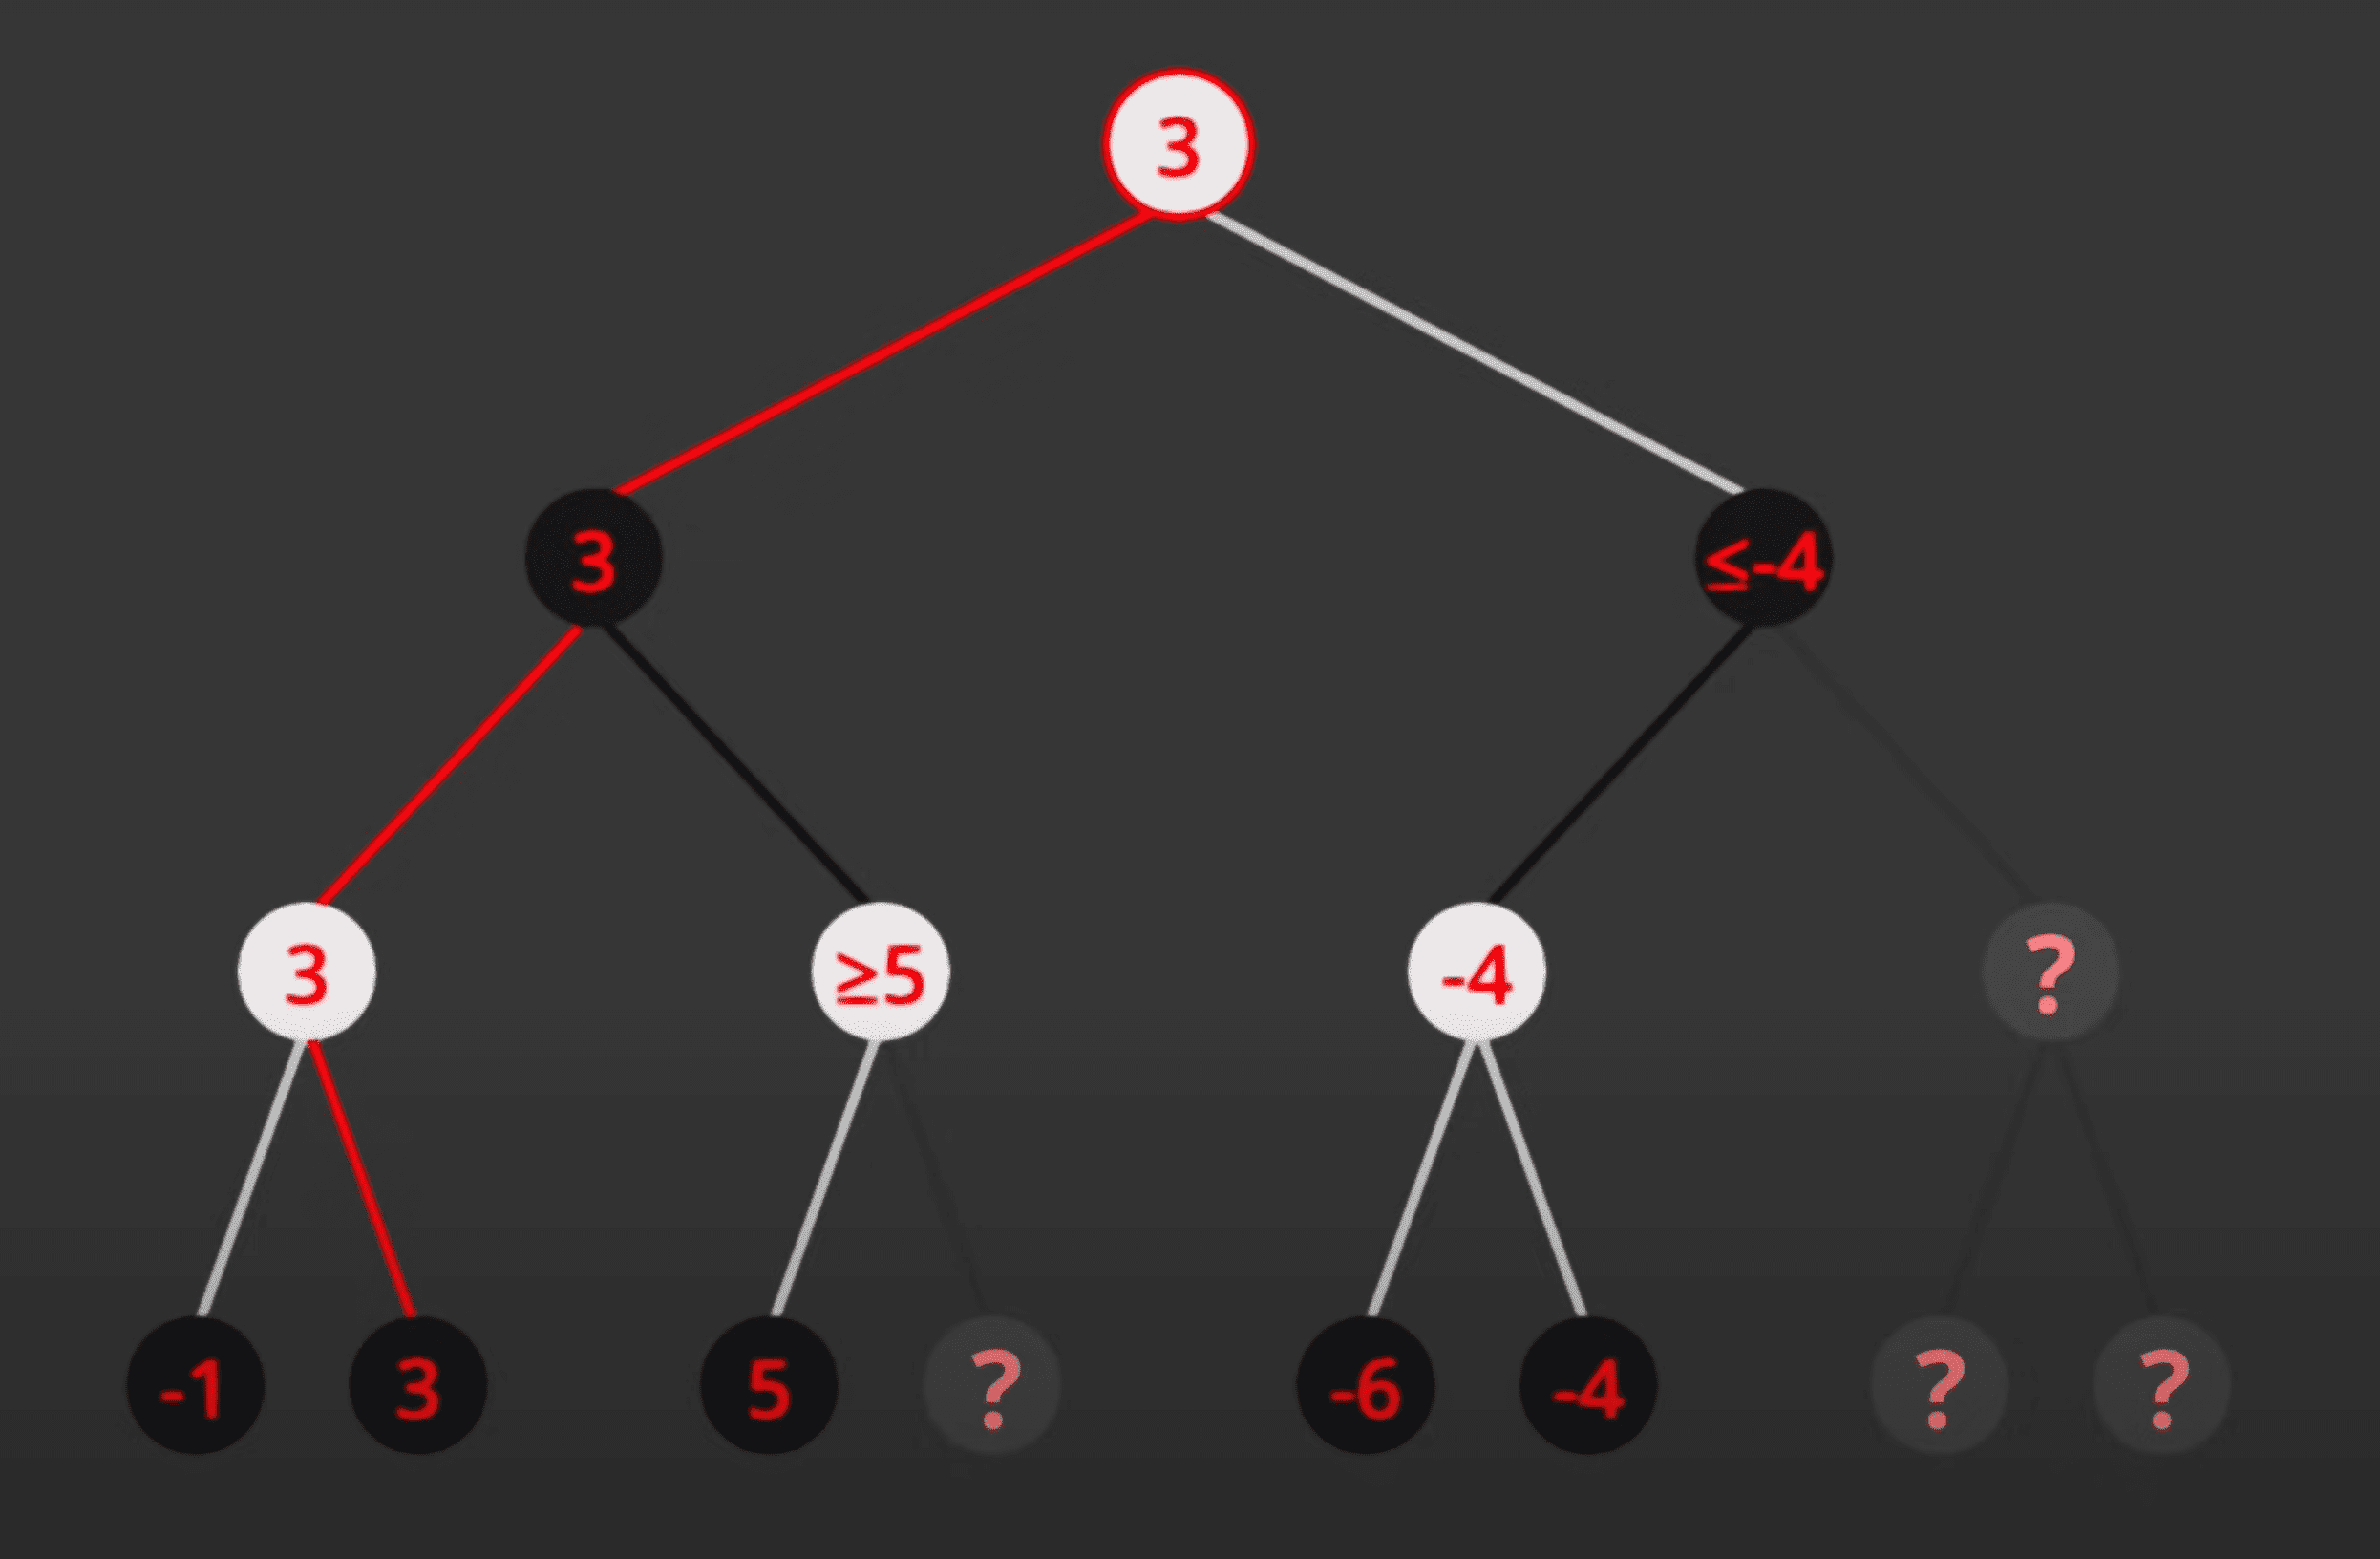

### How does Alpha-Beta Purning work?
It stops evaluating a move when it makes sure that it’s worse than a previously examined move. Such moves need not to be evaluated further.<br>
When added to a simple minimax algorithm, it gives the same output but cuts off certain branches that can’t possibly affect the final decision — dramatically improving the performance

The `player_Group4` function utilizes the Minimax algorithm with Alpha-Beta Pruning to make decisions based on the provided depth parameter. The sample run demonstrates the player_MinMaxAlphaBeta function in a game scenario.


In [16]:
import copy

def player_MiniMaxAlphaBeta(board, player, debug=0):
    possible_moves = placeable_indexes(board)
    best_score = float('-inf')
    best_move = None
    alpha = float('-inf')
    beta = float('inf')
    
    for move in possible_moves:
        row, col = move
        temp_board = copy.deepcopy(board)
        temp_board[row][col] = player
        score = minimax_alphabeta(temp_board, 0, False, player, alpha, beta)
        
        if score > best_score:
            best_score = score
            best_move = move
        
        alpha = max(alpha, best_score)
        
        if alpha >= beta:
            break
    
    if best_move is not None:
        board[best_move[0]][best_move[1]] = player

def minimax_alphabeta(board, depth, is_maximizing, player, alpha, beta):
    scores = {'1': -1, '2': 1, 'draw': 0}
    
    winner = get_winner(board, player)
    if winner is not None:
        return scores[str(winner)]
    
    if is_draw(board):
        return scores['draw']
    
    if is_maximizing:
        best_score = float('-inf')
        possible_moves = placeable_indexes(board)
        
        for move in possible_moves:
            row, col = move
            temp_board = copy.deepcopy(board)
            temp_board[row][col] = player
            score = minimax_alphabeta(temp_board, depth + 1, False, player, alpha, beta)
            best_score = max(score, best_score)
            alpha = max(alpha, best_score)
            
            if alpha >= beta:
                break
            
        return best_score
    else:
        best_score = float('inf')
        possible_moves = placeable_indexes(board)
        
        for move in possible_moves:
            row, col = move
            temp_board = copy.deepcopy(board)
            temp_board[row][col] = 3 - player  # Opponent's move
            score = minimax_alphabeta(temp_board, depth + 1, True, player, alpha, beta)
            best_score = min(score, best_score)
            beta = min(beta, best_score)
            
            if alpha >= beta:
                break
            
        return best_score
    
def get_winner(board, player):
    if is_win(board, player):
        return str(player)
    elif is_win(board, 3 - player):  # Opponent's player
        return str(3 - player)
    elif is_draw(board):
        return 'draw'
    else:
        return None


## Test Bench: player_L0, player_L1, player_L2 vs player_Group4

This test bench assesses the win ratios between player_Group4 and other player fucntions

In [17]:
game_control(1000,player_L0,player_MiniMaxAlphaBeta)
game_control(1000,player_L1,player_MiniMaxAlphaBeta)
game_control(1000,player_L2,player_MiniMaxAlphaBeta)

Game summary

Repeat 1000 times
player_L0 wins: 0, ratio: 0.00
player_MiniMaxAlphaBeta wins: 1000, ratio: 1.00
Draws: 0, ratio: 0.00

Game summary

Repeat 1000 times
player_L1 wins: 0, ratio: 0.00
player_MiniMaxAlphaBeta wins: 1000, ratio: 1.00
Draws: 0, ratio: 0.00

Game summary

Repeat 1000 times
player_L2 wins: 0, ratio: 0.00
player_MiniMaxAlphaBeta wins: 173, ratio: 0.17
Draws: 827, ratio: 0.83



### Github Location
https://github.com/hiroonwijekoon/python-tictactoe-minimax-alpabeta

### References
https://medium.com/chat-gpt-now-writes-all-my-articles/advanced-ai-alpha-beta-pruning-in-python-through-tic-tac-toe-70bb0b15db05 <br>
https://medium.com/@amadi8/tic-tac-toe-agent-using-alpha-beta-pruning-18e8691b61d4 <br>
https://colab.research.google.com/drive/1lOyLT_okEfTw_qhHVgcERtG3OXohYymk?usp=sharing <br>
https://www.youtube.com/watch?v=SLgZhpDsrfc&ab_channel=SpanningTree